**Disclaimer**: For this assignment, Kerem and I compared graphs as a sanity check and he helped me debug a missing 1/N for my gradient update function.

# 1. Logistic Regression for Binary Classification (1.5 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

$\textbf{Answer:}$ Assuming the pythonic implementation where a scalar c $\in \mathbb{R}$ can be added elementwise to a vector by broadcasting, we get the following for $o \in \mathbb{R}^k$:

$$ p(y|\mathbf{o + c}) = \frac{\exp(o_k + c)}{\sum_{j=1}^k \exp(o_{j}  + c)} = \frac{\exp(o_k)\exp(c)}{\sum_{j=1}^k \exp(o_{j})\exp(c)} = \frac{\exp(o_k)\exp(c)}{\exp(c)\sum_{j=1}^k \exp(o_{j})}  = \frac{\exp(o_k)}{\sum_{j=1}^k \exp(o_{j})} $$

2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to 

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

$\textbf{Answer:}$ The probability that y=1 is given by the quantity $\exp(o_1)$ over the partition function:

$$p(y=1|o) = \frac{\exp(o_1)}{ \exp(o_{-1}) + \exp(o_1)}$$

Factoring out a $\exp(o_1)$ we get:

$$ = \frac{1}{ \frac{\exp(o_{-1})}{\exp(o_{1})} + 1}$$

Substituting in 0 for $o_{-1}$ we see that:

$$ = \frac{1}{ \frac{\exp(0)}{\exp(o_{1})} + 1}  =  \frac{1}{ \frac{1}{\exp(o_{1})} + 1} = \frac{1}{\exp(-o_{1}) + 1} $$

3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by 

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

$\textbf{Answer:}$ We first derive the likelihood:

$$ L(\mathbf{o},y) = ∏_{i=1}^{n} p(y^{(i)}|\mathbf{o}) = ∏_{i=1}^{n} \mathrm{softmax(\mathbf{o}})_{y_i} =  ∏_{i=1}^n \frac{\exp(o_{y_i})}{\exp(o_{y_i}) + \exp(o_{-y_i})} $$
 
Using the trick in Problem 2, we can divide out an $\exp(o_{y_i})$ simplify the above product to:

$$  ∏_{i=1}^n \frac{1}{1+\frac{\exp(o_{-y_i})}{\exp(o_{y_i})}} $$ 

If $y_i = 1$ then the inside of the product becomes: $\frac{1}{1+\frac{\exp(o_{-1})}{\exp(o_{1})}} = \frac{1}{1+\exp(-o_{1})}$

If $y_i = -1$ then the inside of the product becomes: $\frac{1}{1+\frac{\exp(o_{1})}{\exp(o_{-11})}} = \frac{1}{1+\exp(o_{1})}$

Combining the two can be done by rewriting the previous product as:

$$ ∏_{i=1}^n \frac{1}{1+\exp(-y_i * o_{1})}$$

The negative log of the likelihood function yields:


$$ -\log [L(\mathbf{o},y)] = -\sum_{i=1}^{n} \log [\frac{1}{1+\exp(-y_i * o_{1})}]  = -\sum_{i=1}^{n} \log(1) - \log(1+\exp(-y_i * o_{1}))$$

$$ = \sum_{i=1}^n \log(1 + exp(-y_i * o_1))  = \sum_{i=1}^n \log(1 + exp(-y_i * o))$$ 

 As we can see by the functional form of the loss function, for a single example we get that:

 $$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$


4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$. 


$$\lim_{o \to ∞} \log(1 + \exp(-1 * o)) = \lim_{o \to \infty} \log(1 + \frac{1}{\exp(o)}) ≈ \log(1 + 0) = 0$$

$$\lim_{o \to -∞} \log(1 + \exp(-1 * o)) = \lim_{o \to \infty} \log(1 + \exp(o)) ≈ \log(1 + ∞) = \infty$$

# 2. Implementing the logistic loss (1 point)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in numpy.
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Derive the derivative of $l(y,o)$ and show your work. Then, in a new plot, plot derivative of $l(y,o)$ with respect to $o$ for $y \in \{-1, 1\}$ and for $o \in [-5, 5]$ without using any automatic differentiation software (e.g. Pytorch, TensorFlow, JAX, etc.).
1. In a new plot, plot $l(y,o)$ with $y = 1$ and $o ∈ [-1000, 1000]$. What happens for large positive and large negative values of $o$? Why?

In [ ]:
# Import Dependencies

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### 2.1 Binary Logistic Loss in Numpy

In [ ]:
def BLL(y, o):
    return np.log(1 + np.exp(-1*y*o))

In [ ]:
# Test the Binary Logistic Loss with what we learned in 1.4

assert BLL(1, -9999999999) == np.inf
assert BLL(1, 99999999999) == 0.0

<ipython-input-4-45b9c2e28e32>:2: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-1*y*o))


In [ ]:
def BLL2(y, o):
    """
    This version implements the clip so that numerical overflow/underflow is 
    avoided. Clips the values of the logits to the range [-90, 90].
    """
    o_c = np.clip(o, -90, 90)
    return np.log(1 + np.exp(-1*y*o_c))

In [ ]:
# Test the Binary Logistic Loss with what we learned in 1.4

BLL2(1, -9999999999)
BLL2(1, 99999999999)

0.0

### 2.2 Plotting the BLL

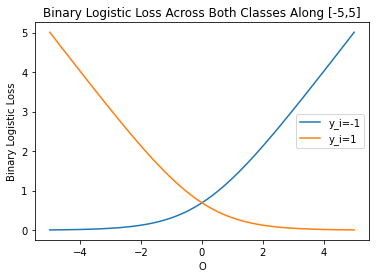

In [ ]:
o = np.linspace(-5, 5, 100)
y = [-1, 1]
for y_i in y:
    plt.plot(o, BLL(y_i, o))
plt.xlabel('O')
plt.ylabel('Binary Logistic Loss')
plt.legend(['y_i=-1', 'y_i=1'])
plt.title('Binary Logistic Loss Across Both Classes Along [-5,5]')
plt.show()

### 2.3 Computing the Derivative of the Loss Function

$$ \frac{\partial}{\partial_o} l(o,y) = \frac{\partial}{\partial_o} \log(1 + \exp(-y*o)) = \frac{\frac{\partial}{\partial_o}[1 + \exp(-y*o)]}{1 + \exp(-y*o)} = \frac{-y*\exp(-y*o)}{1 + \exp(-y*o)} = \frac{-y}{\exp(y*o) + 1}$$

In [ ]:
def dBLL(y, o):
    return (-1*y)/(np.exp(y*o)+1)

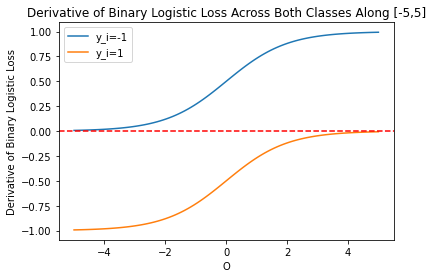

In [ ]:
for y_i in y:
    plt.plot(o, dBLL(y_i, o))
plt.xlabel('O')
plt.ylabel('Derivative of Binary Logistic Loss')
plt.axhline(y=0.0, color='r', linestyle='--')
#plt.axhline(y=0.5, color='g', linestyle='--')
#plt.axhline(y=-0.5, color='g', linestyle='--')
plt.legend(['y_i=-1', 'y_i=1'])
plt.title('Derivative of Binary Logistic Loss Across Both Classes Along [-5,5]')
plt.show()

### 2.4 Plotting BLL for the Positive Class At Large Values of O

<ipython-input-4-45b9c2e28e32>:2: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-1*y*o))
<ipython-input-4-45b9c2e28e32>:2: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-1*y*o))


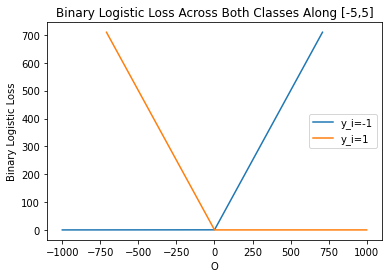

In [ ]:
o = np.linspace(-1000, 1000, 1000)
y = [-1, 1]
for y_i in y:
    plt.plot(o, BLL(y_i, o))
plt.xlabel('O')
plt.ylabel('Binary Logistic Loss')
plt.legend(['y_i=-1', 'y_i=1'])
plt.title('Binary Logistic Loss Across Both Classes Along [-5,5]')
plt.show()

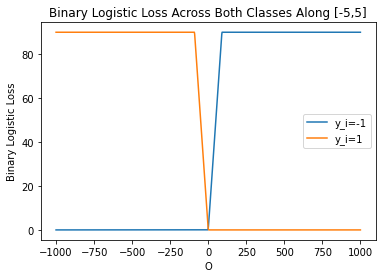

In [ ]:
o = np.linspace(-1000, 1000, 1000)
y = [-1, 1]
for y_i in y:
    plt.plot(o, BLL2(y_i, o))
plt.xlabel('O')
plt.ylabel('Binary Logistic Loss')
plt.legend(['y_i=-1', 'y_i=1'])
plt.title('Binary Logistic Loss Across Both Classes Along [-5,5]')
plt.show()

At really large or small values of o we encounter an error where the computer doesn't allocate enough space to carry the precision required by the computation (overflow and underflow).

# 3. Implementing logistic regression (1.5 points)

Implement a basic logistic regression model and fit it to the data from the new `generate_data` function (below) using gradient descent.
Your model should take the form `o = m*x + b`, where `o` is the output (logits), `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
Train the model using the logistic loss function you derived in the previous problem.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
Print out or plot the loss over the course of training.
You should be able to get a loss that is close to zero by the end of training - make sure you achieve this and **explain why**.

In [ ]:
def generate_data():
    size = 1000
    rng = np.random.default_rng(seed=0)
    y = 2*rng.integers(0, 2, size) - 1
    x = rng.standard_normal((1000,)) + 4*y
    return x, y

### 3.1 Exploratory Data Analysis (EDA)

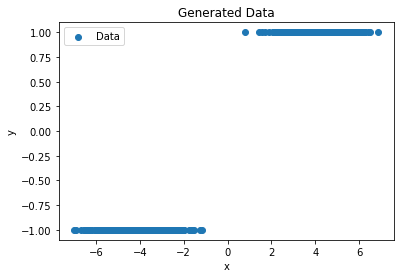

In [ ]:
x,y = generate_data()

plt.scatter(x,y)
plt.title('Generated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Data'])
plt.show()

### 3.2 Defining the Various Classes and Methods

In [ ]:
# Define the DataLoader Class

class DataLoader:
    """
    Implements a Data Loading Class for passing mini-batches to model after
    minor processing to ensure that matrix multiplication works. Assumes shuffle
    to be true.
    """
    def __init__(
          self, 
          inputs,
          labels,
          batch_size
    ):
        self.__len__ = len(labels)
        self.data = self.gen_tensor(inputs)
        self.labels = labels
        self.batch_size = batch_size
        self.called_idx = np.array([], dtype=int)
        self.prefetch = self.__get_idx__()

  
    def reshape_input(self, inputs):
        '''Reshapes input of dims >= 1 to a matrix of n x n_features'''
        n_examples = inputs.shape[0] #Assumes first dim is n_examples
        assert n_examples == self.__len__
        return inputs.reshape(n_examples, int(inputs.size/n_examples))

    def gen_tensor(self, inputs):
        '''Checks for iterable inputs and runs reshape above''' 
        try:
            iter(inputs)
        except TypeError:
            print("Inputs is not an iterable.")
        return self.reshape_input(inputs)

    def __get_idx__(self):
        '''Check that we have enough examples for another batch_size'''
        if self.__len__ - len(self.called_idx) < self.batch_size:
          # On epoch end reset the called indices
          self.called_idx = np.array([], dtype=int)
        remaining_idx = np.delete(np.arange(self.__len__), list(self.called_idx))
        idx = np.random.choice(remaining_idx, self.batch_size, replace=False)
        self.called_idx = np.append(self.called_idx, idx)
        return idx

    def _get_item_(self):
        '''Get a batch of the data when called with batch_size'''
        sampled_idx = self.__get_idx__()
        return (self.data[sampled_idx, :], self.labels[sampled_idx])

In [ ]:
# Define the sigmoid function and LinearRegression Model Class

def sigmoid(z_batched):
    # Defines the sigmoid which is a special case of the softmax
    z_c = np.clip(z_batched, -90, 90)
    return 1/(np.exp(-1*z_c)+1)


class LogisticRegression:
    """
    Implements a Linear Regression Model Class for performing linear regression
    without the closed form solution. Randomly initializes weights and biases 
    before using mini-batch SGD to optimize weights
    """
    def __init__(
        self,
        input_dim
    ):
        self.params = {'weights': np.random.randn(input_dim),
                       'bias': 0}

    def forward(self, X):
        #Vectorized implementation of Forward Call w// broadcasting for bias
        z = X @ self.params['weights'] + self.params['bias']
        # zt = np.asarray([min(abs(zi), 90) for zi in z]) * np.sign(z) 
        return z

    def predict(self, X):
        return np.round(sigmoid(1*self.forward(X)))

In [ ]:
# Define the Gradient Descent Class

class SGD:
    """
    Implements gradient descent algorithm. Works with arbitrary models
    and loss functions (whose gradients are manually implemented).
    """
    def __init__(
        self,
        model, 
        learning_rate,
        grad_fxn
    ):
        self.eta = learning_rate
        self.grad = grad_fxn
        self.model = model

    def step(self, inputs, preds, labels):
        grads = self.grad(inputs, preds, labels)
        self.update_params(grads)

    def update_params(self, grads):
        params = self.model.params.keys()
        for i,p in enumerate(params):
            self.model.params[p] -= self.eta*grads[i]

In [ ]:
#Define the Vectorized Loss Function

def BLL2_vec(y, o):
    """
    Calculates the loss over a minibatch
    """
    n = len(y)
    return np.sum(BLL2(y,o))/n

def BLL2_grad(inputs, outs, labels):
    """
    Gradient calculated by hand and simplified to get the following:
    """
    w_grad = np.dot(inputs.T, dBLL(labels, outs))/len(labels)
    b_grad = np.dot(np.ones(len(labels)), dBLL(labels, outs))/len(labels)
    return w_grad, b_grad

In [ ]:
# Define the Train_Iters Function

def train_iters(iterations, data_loader, model, lossfn, optimizer):
    running_loss = 0
    loss = []
    for i in tqdm(range(iterations)):
        x,y = data_loader._get_item_()
        o = model.forward(x)
        # preds = model.predict(x)
        running_loss += lossfn(y, o)
        if  (i + 1) % 100 == 0:
            loss += [running_loss/100]
            running_loss = 0
        optimizer.step(x, o, y)
    return loss

In [ ]:
dl = DataLoader(x,y, 64)
lr = LogisticRegression(1)
optim = SGD(lr, .005, BLL2_grad)

In [ ]:
training_loss = train_iters(1000, dl, lr, BLL2_vec, optim)

100%|██████████| 1000/1000 [00:00<00:00, 6153.41it/s]


In [ ]:
lr.params

{'weights': array([1.09192195]), 'bias': 0.027598170247818684}

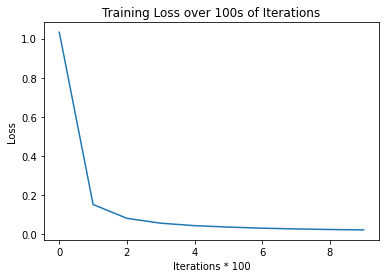

In [ ]:
plt.plot(training_loss)
plt.xlabel("Iterations * 100")
plt.ylabel("Loss")
plt.title("Training Loss over 100s of Iterations")
plt.show()

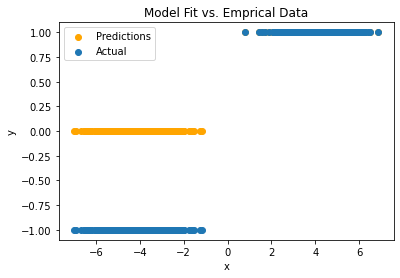

In [ ]:
plt.scatter(x, lr.predict(x.reshape(-1, 1)), color='orange')
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Predictions', 'Actual'])
plt.title('Model Fit vs. Emprical Data')
plt.show()

**Answer**: The reason that we are able to achieve zero loss, is because the data is separable by a vertical line which makes for a very simple logistic regression model. In fact one wouldn't even need a logistic rergression model as a vertical line at x =0 would have be a model with zero error. This the reason that the gradient update method is able to get near zero loss.